csv 파일에서 한 라인씩 데이터 출력

In [109]:
import csv

f = open('daegu.csv', 'r', encoding='utf-8')
data = csv.reader(f, delimiter=',')
count = 0
for row in data:
    if count > 5:
        break
    else:
        print(row)
    count += 1

f.close

['\ufeff날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
['\t1907-01-31', '143', '', '-7', '0.8']
['\t1907-02-01', '143', '', '', '']
['\t1907-02-02', '143', '', '', '']
['\t1907-02-03', '143', '', '', '']
['\t1907-02-04', '143', '', '', '']


<function TextIOWrapper.close()>

대구 기온 데이터 수정 (utf-8-sig 및 '\t' 제거)

In [110]:
import csv
# encoding = 'utf-8-sig'로 '\ufeff' 제거
fin = open('daegu.csv', 'r', encoding = 'utf-8-sig')
data = csv.reader(fin, delimiter=',')

# newline = '': 한 라인씩 건너 뛰며 저장되는 현상 없앰
fout = open('daegu-utf8.csv', 'w', newline = '', encoding = 'utf-8-sig')
wr = csv.writer(fout)

for row in data:
    for i in range(len(row)):
        row[i] = row[i].replace('\t', '')
    print(row)
    wr.writerow(row) # writerow(row): 한 행씩 파일로 저장

fin.close()
fout.close()
print('파일 저장 완료')

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
['1907-01-31', '143', '', '-7', '0.8']
['1907-02-01', '143', '', '', '']
['1907-02-02', '143', '', '', '']
['1907-02-03', '143', '', '', '']
['1907-02-04', '143', '', '', '']
['1907-02-05', '143', '', '', '']
['1907-02-06', '143', '', '', '']
['1907-02-07', '143', '', '', '']
['1907-02-08', '143', '', '', '']
['1907-02-09', '143', '', '', '']
['1907-02-10', '143', '', '-3', '4.8']
['1907-02-11', '143', '', '', '']
['1907-02-12', '143', '', '', '']
['1907-02-13', '143', '', '', '']
['1907-02-14', '143', '', '', '']
['1907-02-15', '143', '', '', '']
['1907-02-16', '143', '', '', '']
['1907-02-17', '143', '', '', '']
['1907-02-18', '143', '', '', '']
['1907-02-19', '143', '', '', '']
['1907-02-20', '143', '', '-3.4', '7.6']
['1907-02-21', '143', '', '', '']
['1907-02-22', '143', '', '', '']
['1907-02-23', '143', '', '', '']
['1907-02-24', '143', '', '', '']
['1907-02-25', '143', '', '', '']
['1907-02-26', '143', '', '', '']
['1907-02-27', '143

대구 최저, 최고 기온 날짜와 온도 구하기 예제 #1

In [111]:
import csv

def get_minmax_temp(data):
    '''
        최고 기온 및 최고 기온의 날짜 구하기
    '''
    header = next(data)

    min_temp = 100  # 최저 기온 값을 저장할 변수 초기화(가장 큰 값)
    min_date = ''   # 최저 기온의 날짜를 지정할 변수 초기화

    max_temp = -999 # 최고 기온을 저장할 변수 초기화(가장 작은 값)
    max_date = ''   # 최고 기온의 날짜를 저장할 변수 초기화

    for row in data:
        if row[3] == '':
            row[3] = 100 # 최저 기온 결측값 100으로
        row[3] = float(row[3])

        if row[4] == '':  # [-1]: 리스트에서 마지막 데이터가 없는 경우
            row[4] = -999 # 최고 기온 결측값 -999로
        row[4] = float(row[4])

        # 최저 기온 계산
        if row[3] < min_temp:
            min_temp = row[3]
            min_date = row[0]
            print(f'최저기온 업데이트: {min_date}, {min_temp}')

        # 최고 기온 계산
        if row[4] > max_temp:
            max_temp = row[4]
            max_date = row[0] # 날짜 : index[0]
            print(f'최고기온 업데이트: {max_date}, {max_temp}')

    print('-' * 50)
    print(f'대구 최저 기온 날짜: {min_date}, 온도: {min_temp}')
    print(f'대구 최고 기온 날짜: {max_date}, 온도: {max_temp}')

def main():
    f = open('daegu-utf8.csv', encoding = 'utf-8-sig')
    data = csv.reader(f)
    get_minmax_temp(data)
    f.close()

main()

최저기온 업데이트: 1907-01-31, -7.0
최고기온 업데이트: 1907-01-31, 0.8
최고기온 업데이트: 1907-02-10, 4.8
최고기온 업데이트: 1907-02-20, 7.6
최고기온 업데이트: 1907-02-27, 15.5
최고기온 업데이트: 1907-03-09, 22.5
최고기온 업데이트: 1907-04-13, 23.5
최고기온 업데이트: 1907-05-31, 33.4
최고기온 업데이트: 1907-06-30, 35.5
최고기온 업데이트: 1907-08-13, 35.6
최저기온 업데이트: 1907-12-20, -8.7
최저기온 업데이트: 1908-02-06, -9.5
최고기온 업데이트: 1908-08-05, 37.8
최저기온 업데이트: 1909-02-07, -10.9
최저기온 업데이트: 1910-01-30, -12.9
최저기온 업데이트: 1910-01-31, -14.5
최저기온 업데이트: 1913-02-09, -14.8
최고기온 업데이트: 1913-07-28, 38.9
최저기온 업데이트: 1915-01-12, -15.6
최저기온 업데이트: 1915-01-13, -18.6
최고기온 업데이트: 1915-08-05, 39.0
최저기온 업데이트: 1923-01-18, -19.6
최저기온 업데이트: 1923-01-19, -20.2
최고기온 업데이트: 1927-07-28, 39.2
최고기온 업데이트: 1932-07-30, 39.3
최고기온 업데이트: 1939-07-20, 39.4
최고기온 업데이트: 1939-07-21, 39.6
최고기온 업데이트: 1942-07-28, 39.7
최고기온 업데이트: 1942-08-01, 40.0
--------------------------------------------------
대구 최저 기온 날짜: 1923-01-19, 온도: -20.2
대구 최고 기온 날짜: 1942-08-01, 온도: 40.0


최고 기온 데이터를 히스토그램으로 표현

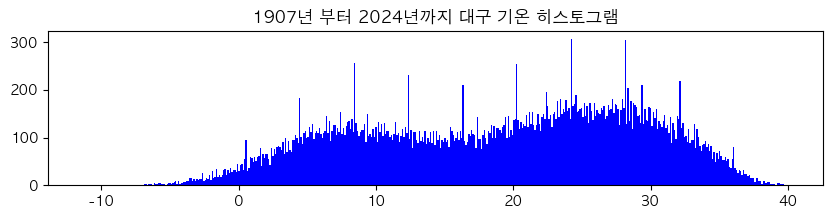

In [112]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

f = open('daegu-utf8.csv', encoding = 'utf-8-sig')
data = csv.reader(f)
next(data)
result = []

for row in data:
    if row[-1] != '':   # 최고 기온을 리스트에 저장
            result.append(float(row[-1]))
f.close()

plt.figure(figsize = (10, 2))
plt.hist(result, bins = 500, color = 'blue') # result에 저장된 값을 히스토그램으로 그림
plt.rcParams['font.family'] = 'AppleGothic'

# plt.rcParams['axes.unicode_minus'] = False  # 레이블에 마이너스('-')기호 깨지는 현상 해결
plt.title('1907년 부터 2024년까지 대구 기온 히스토그램')
plt.show()

기온 히스토그램

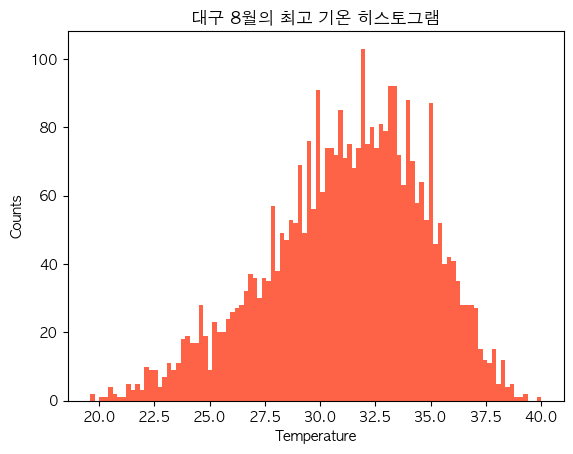

In [113]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

f = open('daegu-utf8.csv', encoding = 'utf-8-sig')
data = csv.reader(f)
next(data)
aug = []

for row in data:
    if row[0] != '' and row[4] != '':
        month = row[0].split('-')[1]
        if month == '08':
            aug.append(float(row[-1]))
f.close()

plt.hist(aug, bins = 100, color = 'tomato')
plt.title('대구 8월의 최고 기온 히스토그램')
plt.xlabel('Temperature')   # x축 레이블
plt.ylabel('Counts')        # y축 레이블
plt.show()

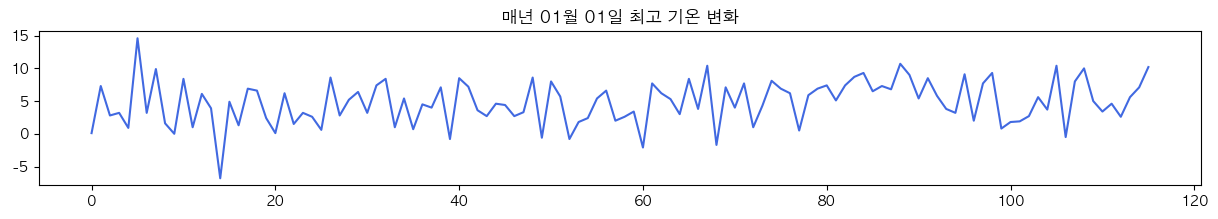

In [114]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

def draw_graph_on_date(month, day):
    f = open('daegu-utf8.csv', encoding = 'utf-8-sig')
    data = csv.reader(f)
    next(data)
    result = []
    for row in data:
        if row[-1] != '':
            date_string = row[0].split('-')
            if date_string[1] == month and date_string[2] == day:
                result.append(float(row[-1])) # 최고 기온을 실수형으로 변환 후 리스트에 추가

    f.close()
    plt.figure(figsize = (15, 2))
    plt.plot(result, 'royalblue')

    plt.title(f'매년 {month}월 {day}일 최고 기온 변화')
    plt.show()

month, date = input('날짜(월 일)를 입력하세요: ').split()
draw_graph_on_date(month, date)

200년 이후 특정일의 최저, 최고 기온 찾기

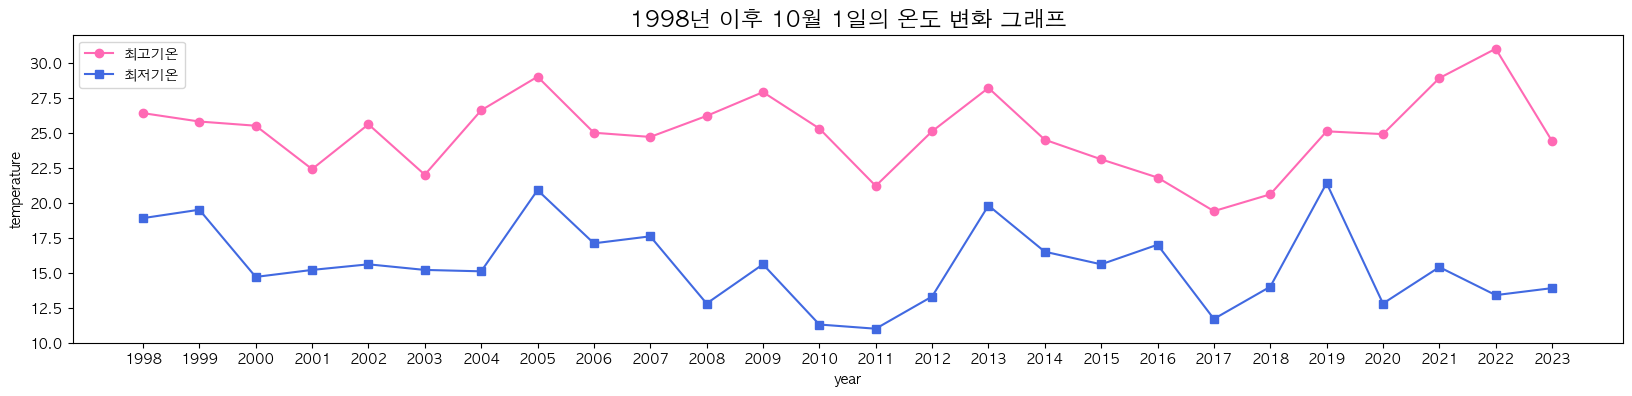

In [115]:
import csv
import matplotlib.pyplot as plt

def draw_lowhigh_graph(start_year, month, day):
    f = open('daegu-utf8.csv', encoding = 'utf-8-sig')
    data = csv.reader(f)
    next(data)
    high_temp = []  # 최고 기온을 저장할 리스트
    low_temp = []   # 최저 기온을 저장할 리스트
    x_year = []     # x축 연도를 저장할 리스트
    for row in data:
        if row[-1] != '':
            date_string = row[0].split('-') # 날짜 데이터를 미리 분리함
            if int(date_string[0]) >= start_year: # 문자열 값을 int형으로 변환해서 비교
                if int(date_string[1]) == month and int(date_string[2]) == day:
                    high_temp.append(float(row[-1]))
                    low_temp.append(float(row[-2]))
                    x_year.append(date_string[0]) # 연도 저장
            
    plt.figure(figsize = (20, 4))
    plt.plot(x_year, high_temp, 'hotpink', marker = 'o', label = '최고기온') # 최고 기온 그래프
    plt.plot(x_year, low_temp, 'royalblue', marker = 's', label = '최저기온') # 최저 기온 그래프

    plt.rcParams['font.family'] = 'AppleGothic'
    plt.title(f'{start_year}년 이후 {month}월 {day}일의 온도 변화 그래프', size = 16)

    plt.legend(loc = 2)
    plt.xlabel('year')
    plt.ylabel('temperature')
    plt.show()

draw_lowhigh_graph(1998, 10, 1)

Pandas를 활용한 기온 데이터

In [116]:
import pandas as pd

weather_df = pd.read_csv('daegu-utf8.csv', encoding = 'utf-8-sig')
print(weather_df.columns)
print(weather_df['날짜'].dtype) # 날짜 컬럼은 object 타입

Index(['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')
object


In [117]:
weather_df.columns = ['날짜', '지점', '평균기온', '최저기온', '최고기온']
print(weather_df.columns)

Index(['날짜', '지점', '평균기온', '최저기온', '최고기온'], dtype='object')


In [118]:
weather_df['날짜'] = pd.to_datetime(weather_df['날짜'], format = '%Y-%m-%d')
print(weather_df['날짜'].dtype)

datetime64[ns]


In [119]:
print(weather_df.head(5))
print(weather_df.shape)
num_rows = weather_df.shape[0] # shape(row, col), shape[0]: row의 개수
num_missing = num_rows - weather_df.count() # count(): 정상값의 개수
print(num_missing)

          날짜     지점  평균기온  최저기온  최고기온
0 1907-01-31  143.0   NaN  -7.0   0.8
1 1907-02-01  143.0   NaN   NaN   NaN
2 1907-02-02  143.0   NaN   NaN   NaN
3 1907-02-03  143.0   NaN   NaN   NaN
4 1907-02-04  143.0   NaN   NaN   NaN
(42887, 5)
날짜        1
지점        1
평균기온    704
최저기온    630
최고기온    632
dtype: int64


In [120]:
weather_df = weather_df.dropna(axis = 0)
print(weather_df.count())
print(weather_df.head(5))

날짜      42180
지점      42180
평균기온    42180
최저기온    42180
최고기온    42180
dtype: int64
            날짜     지점  평균기온  최저기온  최고기온
701 1909-01-01  143.0  -4.1  -8.0   0.1
702 1909-01-02  143.0  -0.8  -6.7   6.1
703 1909-01-03  143.0   1.0  -2.4   3.6
704 1909-01-04  143.0   4.2   0.0   9.2
705 1909-01-05  143.0   3.4  -0.4   9.0


In [121]:
weather_df.to_csv('daegu-utf8.csv', index = False, mode = 'w', encoding = 'utf-8-sig')

In [122]:
print('특정 연도와 달의 최고, 최저 기온 평균값 계산')

year_df = weather_df[weather_df['날짜'].dt.year == 2023]
month_df = year_df[year_df['날짜'].dt.month == 8]
print(month_df.head())

특정 연도와 달의 최고, 최저 기온 평균값 계산
              날짜     지점  평균기온  최저기온  최고기온
42551 2023-08-01  143.0  29.7  24.9  34.8
42552 2023-08-02  143.0  30.0  23.9  34.7
42553 2023-08-03  143.0  31.5  27.0  37.7
42554 2023-08-04  143.0  30.5  26.0  34.7
42555 2023-08-05  143.0  31.5  25.7  37.2


In [123]:
max_temp_mean = round(month_df['최고기온'].mean(), 1)
min_temp_mean = round(month_df['최저기온'].mean(), 1)

print(f'2023년 8월 최저기온 평균: {min_temp_mean}, 최고기온 평균: {max_temp_mean}')

2023년 8월 최저기온 평균: 24.0, 최고기온 평균: 31.9


1990년대와 2010년대 최고 기온 비교 #1

In [124]:
def draw_two_plots(title, x_data, max_temp_list1, label_y1, max_temp_list2, label_y2):

    plt.rcParams['font.family'] = 'AppleGothic'
    plt.figure(figsize = (10, 4))
    plt.plot(x_data, max_temp_list1, marker = 's', markersize = 6, color = 'b', label = label_y1)
    plt.plot(x_data, max_temp_list2, marker = 's', markersize = 6, color = 'r', label = label_y2)
    plt.xticks(x_data) # 모든 xtick값을 출력함

    # plt.ylim(10, 40)
    plt.title(title)
    plt.legend()
    plt.show()

1990년대 8월 최고 기온 평균: [33.9, 28.3, 29.0, 27.0, 34.5, 34.0, 32.3, 30.9, 30.1, 29.1]
2010년대 8월 최고 기온 평균: [33.6, 30.3, 32.4, 34.4, 28.8, 31.2, 33.2, 31.4, 32.9, 32.2]
1990년대 8월 전체 최고 기온 평균: 30.9
2010년대 8월 전체 최고 기온 평균: 32.0


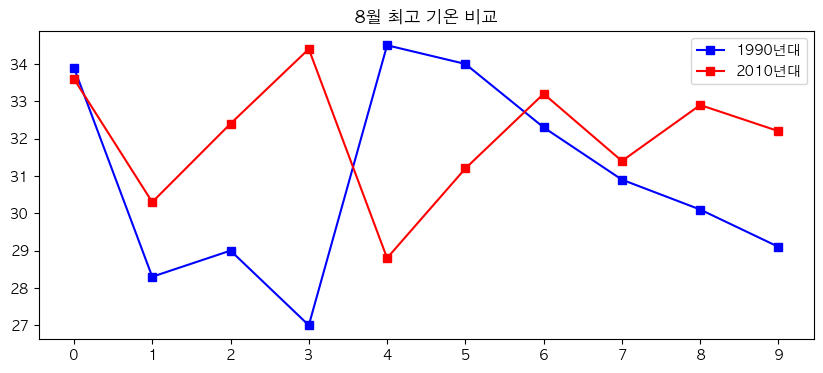

In [125]:
def main():
    search_month = int(input('비교할 월을 입력하세요: '))

    weather_df = pd.read_csv('daegu-utf8.csv', encoding = 'utf-8-sig')
    weather_df['날짜'] = pd.to_datetime(weather_df['날짜'], format = '%Y-%m-%d')

    first_decade_max_temp_list = [0] * 10 # 10년 동안 각 월의 평균 저장
    second_decade_max_temp_list = [0] * 10

    first_decade = 1990
    second_decade = 2010

    for year in range(10):
        first_decade_df = weather_df[(weather_df['날짜'].dt.year == first_decade + year) & 
                                     (weather_df['날짜'].dt.month == search_month)]
        first_decade_max_temp_list[year] = round(first_decade_df['최고기온'].mean(), 1)
        
        second_decade_df = weather_df[(weather_df['날짜'].dt.year == second_decade + year) & 
                                     (weather_df['날짜'].dt.month == search_month)]
        second_decade_max_temp_list[year] = round(second_decade_df['최고기온'].mean(), 1)

    print(f'{first_decade}년대 {search_month}월 최고 기온 평균: {first_decade_max_temp_list}')
    print(f'{second_decade}년대 {search_month}월 최고 기온 평균: {second_decade_max_temp_list}')

    first_decade_high_temp_mean = round(sum(first_decade_max_temp_list) / 
                                        len(first_decade_max_temp_list), 1)
    
    second_decade_high_temp_mean = round(sum(second_decade_max_temp_list) / 
                                        len(second_decade_max_temp_list), 1)
    
    print(f'{first_decade}년대 {search_month}월 전체 최고 기온 평균: {first_decade_high_temp_mean}')
    print(f'{second_decade}년대 {search_month}월 전체 최고 기온 평균: {second_decade_high_temp_mean}')

    x_data = [i for i in range(10)]
    draw_two_plots(f'{search_month}월 최고 기온 비교', x_data,
                   first_decade_max_temp_list, str(first_decade) + '년대',
                   second_decade_max_temp_list, str(second_decade) + '년대')
    
main()
    